In [1]:
import numpy as np
import pandas as pd 
import gmplot
import matplotlib.pyplot as plt
import math
import rospy
import numpy as np
import pyproj
import scipy.spatial.transform  
import time
import datetime
import mplleaflet
from scipy.interpolate import make_interp_spline

# Winterwheat dataset

In [39]:
def trajectory_plot(df_1,df_2,df_3):
    latitudes_1 = df_1[".LLA.x"]
    longitudes_1 = df_1[".LLA.y"]
    altitude_1 = df_1[".LLA.z"]
    
    latitudes_2 = df_2[".latitude"]
    longitudes_2 = df_2[".longitude"]
    altitude_2 = df_2[".altitude"]

    latitudes_3 = df_3[".pose.pose.position.x"]
    longitudes_3 = df_3[".pose.pose.position.y"]
    altitude_3 = df_3[".pose.pose.position.z"]

    latitude_min = df_1[".LLA.x"].min()
    latitude_max =df_1[".LLA.x"].max()
    longitude_min = df_1[".LLA.y"].min()
    longitude_max =df_1[".LLA.y"].max()

    map_1 = plt.imread("map_2.png")
    fig,ax = plt.subplots(figsize = (8,8))

    ax.set_title("Trajectory - raw gps vs raw_GPS/INS vs ethzal_fusion")
    ax.set_ylim(longitude_min-0.0002,longitude_max+0.0002)
    ax.set_xlim(latitude_min-0.00005,latitude_max+0.00005)
    ax.set_xlabel("latitude")
    ax.set_ylabel("longitude")
    ax.plot(latitudes_1,longitudes_1,c="r",label="Raw_gps")
    ax.plot(latitudes_2,longitudes_2,c="b",label = "noise_gps")
    ax.plot(latitudes_3,longitudes_3,c="y",label="ethzal_position_fusion")
    plt.grid()
    ax.legend()
    
    fig_2 = plt.figure(figsize=(8,8))
    ax_2 = fig_2.add_subplot(111, projection='3d')
    ax_2.plot(latitudes_1,longitudes_1,altitude_1,c="r",label="raw_gps")
    ax_2.plot(latitudes_2,longitudes_2,altitude_2,c="b",label = "noise_gps")
    ax_2.plot(latitudes_3,longitudes_3,altitude_3,c="y",label="ethzal_position_fusion")
    ax_2.set_xlabel("latitude",fontsize=20)
    ax_2.set_ylabel("longitude",fontsize=20)
    ax_2.set_zlabel("altitude",fontsize=20)
    ax_2.legend()
    ax_2.legend()
    plt.grid()
    plt.show()
#     plt.imshow(map_1,aspect="equal",extent=(longitude_min,longitude_max,latitude_min,longitude_max))

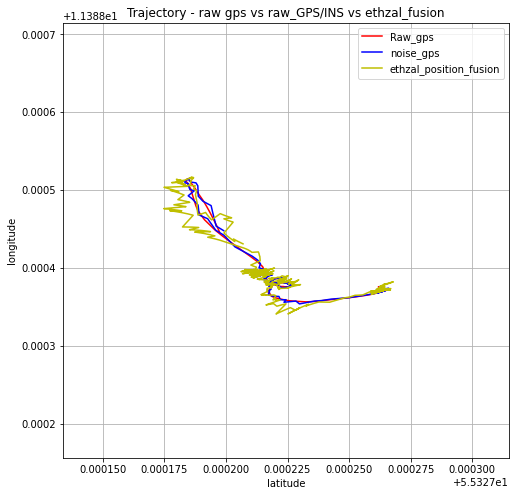

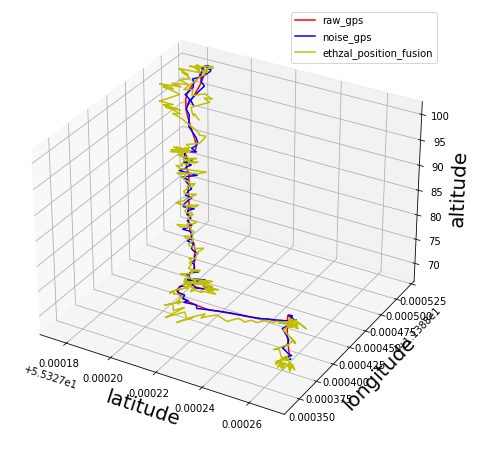

In [40]:
df_1 = pd.read_csv("2021-06-30-16-10-24-vectornav-vn_gps.csv") ## bluebird acc/gyro bias and noise 
df_2 = pd.read_csv("2021-06-30-16-10-24-noise_gps.csv")        # gausian noise of 0.0000001
df_3 = pd.read_csv("2021-06-30-16-10-24-corrected_pose.csv")
trajectory_plot(df_1,df_2,df_3)

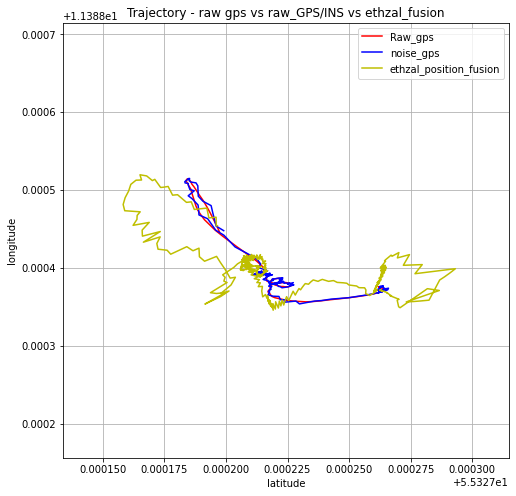

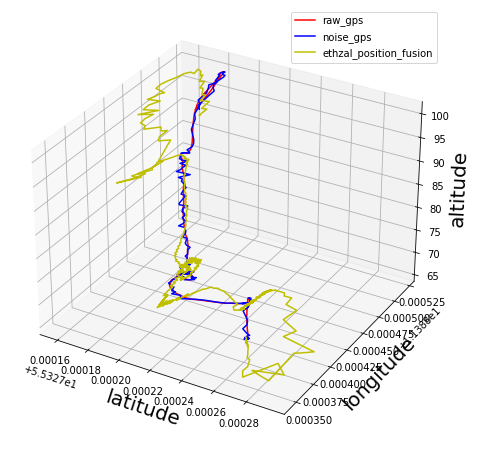

In [41]:
df_1 = pd.read_csv("2021-06-30-16-10-24-vectornav-vn_gps.csv") ## vn200 accel and angular noise
df_2 = pd.read_csv("2021-06-30-16-10-24-noise_gps.csv")      # gausian noise of 0.0000001
df_3 = pd.read_csv("2021-07-13-14-34-58-corrected_pose.csv")
trajectory_plot(df_1,df_2,df_3)

# Hongkong Dataset

In [5]:
def trajectory_plot_2(df_1,df_2,df_3):

    latitudes_1 = df_1[".latitude"]
    longitudes_1 = df_1[".longitude"]
    altitude_1 = df_1[".altitude"]

    latitudes_2 = df_2[".latitude"]
    longitudes_2 = df_2[".longitude"]
    altitude_2 = df_2[".altitude"]


    latitudes_3 = df_3[".pose.pose.position.x"]
    longitudes_3 = df_3[".pose.pose.position.y"]
    altitude_3 = df_3[".pose.pose.position.z"]

    latitude_min = df_2[".latitude"].min()
    latitude_max =df_2[".latitude"].max()
    longitude_min = df_2[".longitude"].min()
    longitude_max =df_2[".longitude"].max()

    
    map_1 = plt.imread("map_tokyo.png")

    fig,ax = plt.subplots(figsize = (8,8))


    ax.set_ylim(longitude_min-0.00005,longitude_max+0.00005)
    ax.set_xlim(latitude_min-0.00005,latitude_max+0.00005)

    ax.set_xlabel("latitude(deg)",fontsize=15)
    ax.set_ylabel("longitude(deg)",fontsize=15)
    ax.plot(latitudes_1,longitudes_1,c="r",label="Raw_gps")

    ax.plot(latitudes_2,longitudes_2,c="b",label = "Ground_truth")

    ax.plot(latitudes_3,longitudes_3,c="y",label="ethzal_fusion")

    ax.legend()
    ax.grid()
    ax.imshow(map_1,extent=(longitude_min,longitude_max,latitude_min,longitude_max))

    fig_2 = plt.figure(figsize=(8,8))
    ax_2 = fig_2.add_subplot(111, projection='3d')
    ax_2.plot(latitudes_1,longitudes_1,altitude_1,c="r",label="raw_gps")

    ax_2.plot(latitudes_2,longitudes_2,altitude_2,c="b",label = "ground_truth")

    ax_2.plot(latitudes_3,longitudes_3,altitude_3,c="y",label="ethzal_position_fusion")

    ax_2.set_xlabel("latitude(deg)",fontsize=15)
    ax_2.set_ylabel("longitude(deg)",fontsize=15)
    ax_2.set_zlabel("altitude(m)",fontsize=15)
    ax_2.legend()
    ax_2.grid()
    plt.show()
    

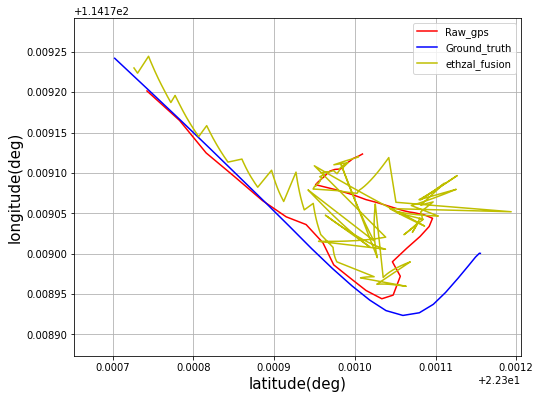

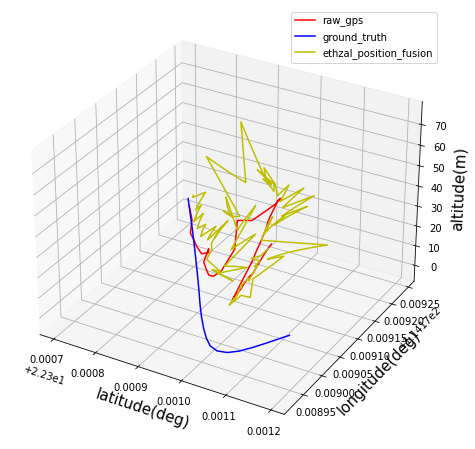

In [6]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## Hongkong dataset by giving init yaw value -141.76 
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")      # xsensmti noise parameters with noisemeas = 0.5
df_3 = pd.read_csv("2021-07-24-19-40-51-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

# Bluebird sensor noise matrix on hongkong dataset



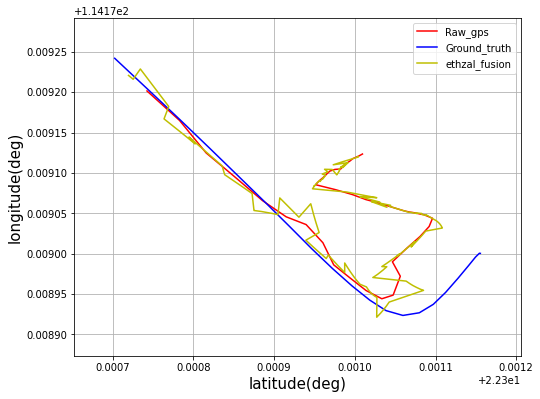

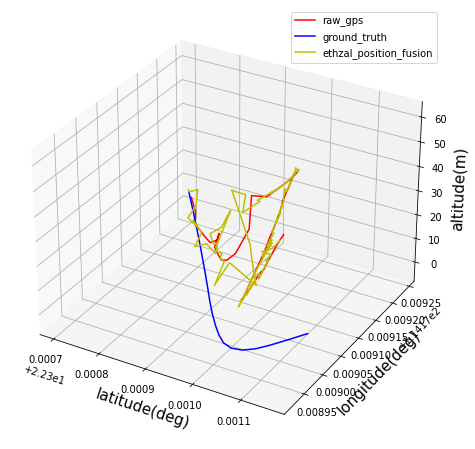

In [7]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76 
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used blubird
df_3 = pd.read_csv("2021-07-25-07-48-52-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

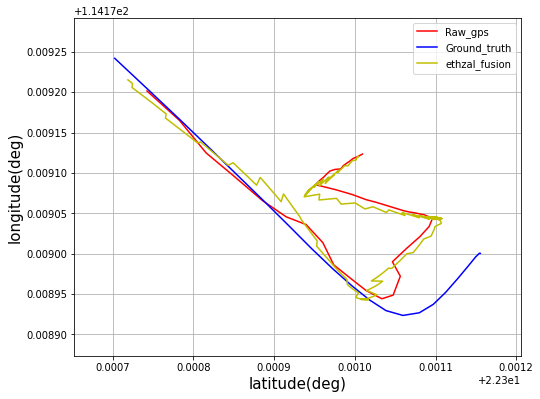

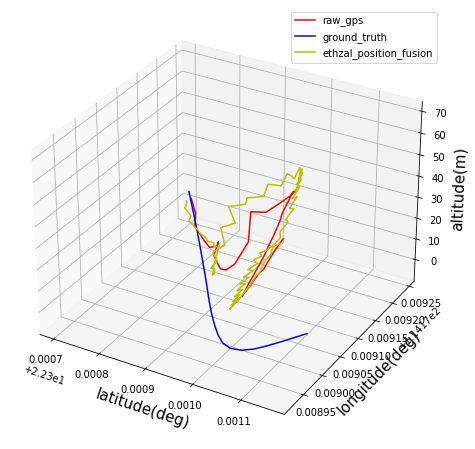

In [8]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")      # used blubird and position_noise = 0.9
df_3 = pd.read_csv("2021-07-25-08-34-04-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

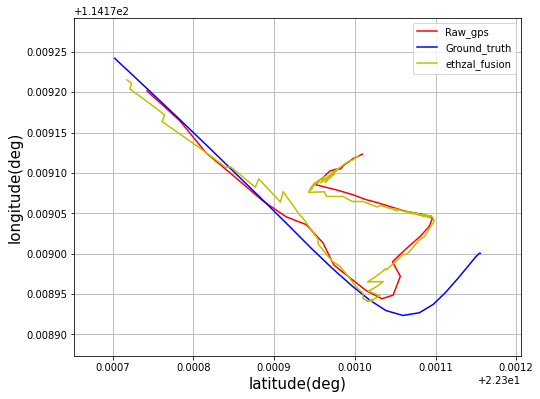

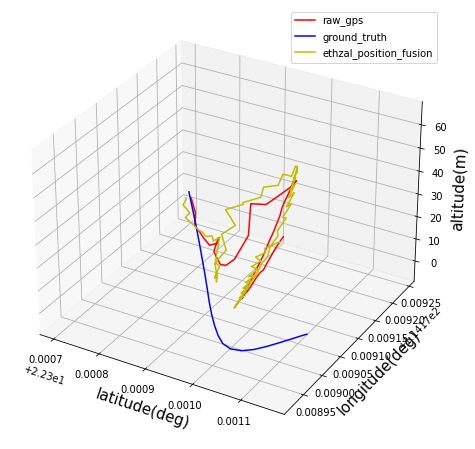

In [9]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ##hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")      # used blubird and position_noise = 0.5
df_3 = pd.read_csv("2021-07-25-11-07-26-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

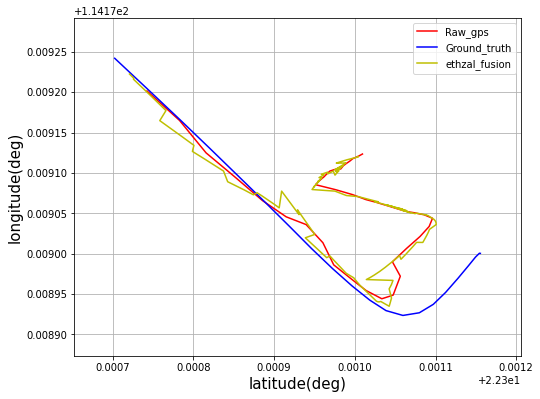

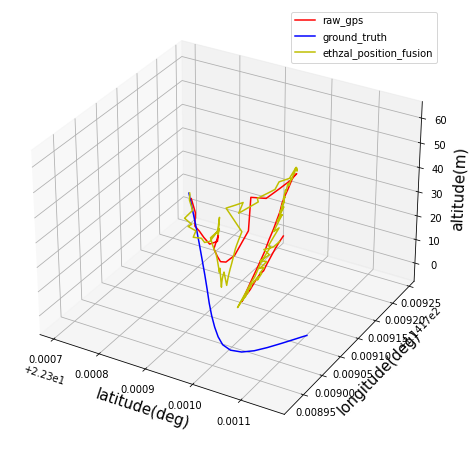

In [10]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used blubird and position_noise = 0.1
df_3 = pd.read_csv("2021-07-25-11-29-06-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

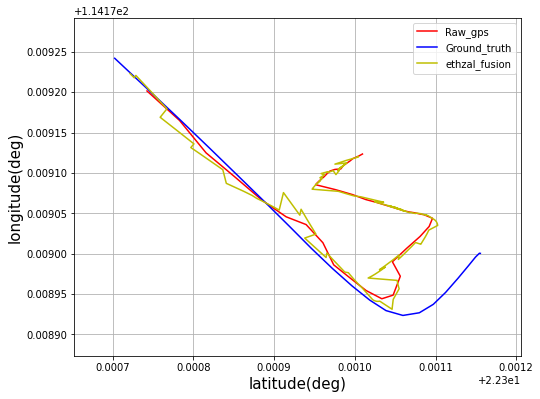

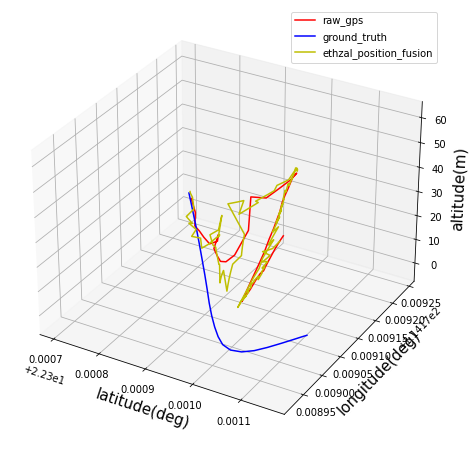

In [11]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used blubird and position_noise = 0.06
df_3 = pd.read_csv("2021-07-25-11-42-41-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

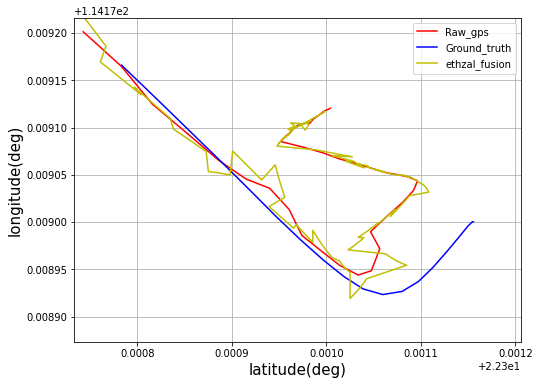

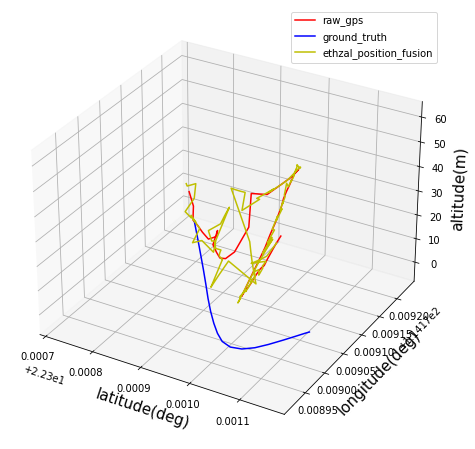

In [12]:
df_1 = pd.read_csv("2021-09-07-01-22-43-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-09-07-01-22-43-novatel_data-inspvax.csv")     # used blubird and position_noise = 0.01
df_3 = pd.read_csv("2021-09-07-01-22-43-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

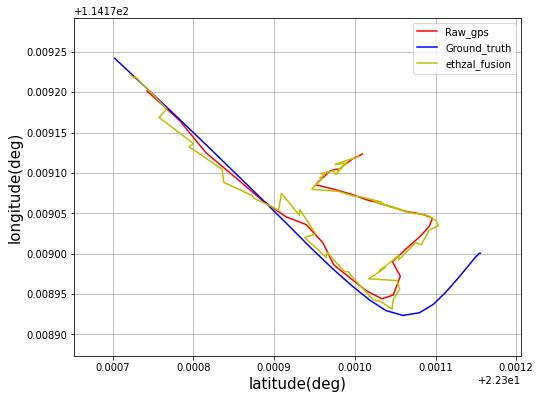

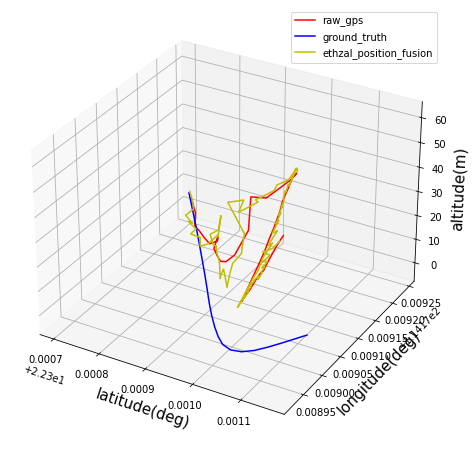

In [13]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used blubird and position_noise = 0.01
df_3 = pd.read_csv("2021-07-25-14-16-04-corrected_pose.csv")# with fixed core bias
trajectory_plot_2(df_1,df_2,df_3)

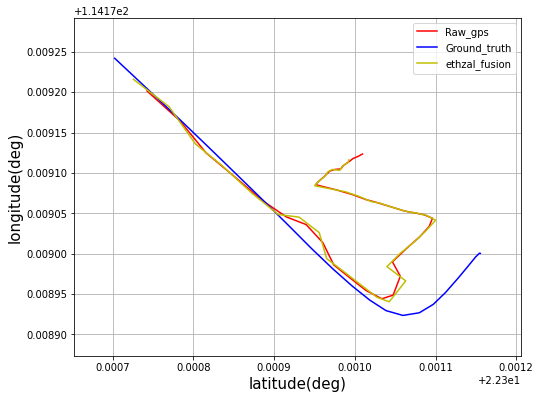

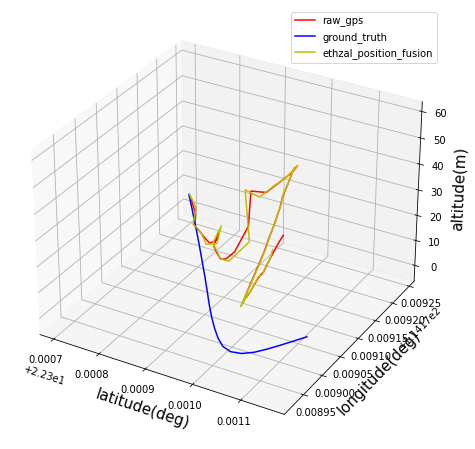

In [14]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")      # used blubird and position_noise = 0.01
df_3 = pd.read_csv("2021-07-26-22-01-00-corrected_pose.csv")# taking state_out
trajectory_plot_2(df_1,df_2,df_3)

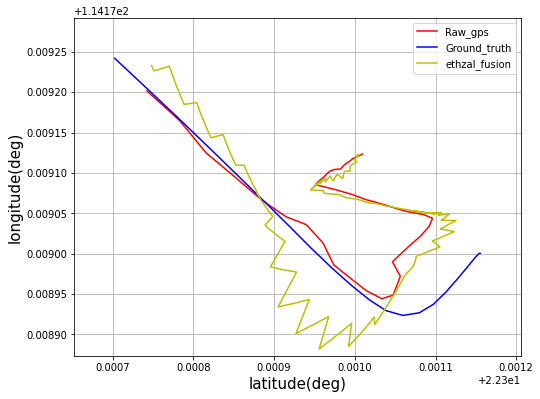

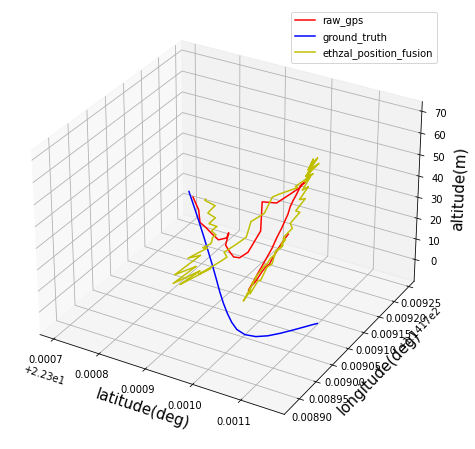

In [15]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset without init yaw
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")      # used blubird and position_noise = 0.9
df_3 = pd.read_csv("2021-07-25-10-54-05-corrected_pose.csv") # taking stateout
trajectory_plot_2(df_1,df_2,df_3)

# used xsens mti and observing stateout position 


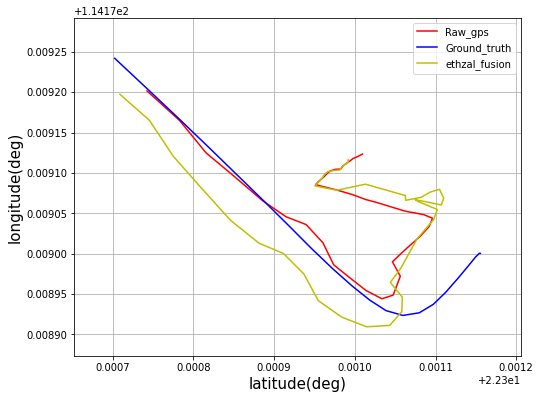

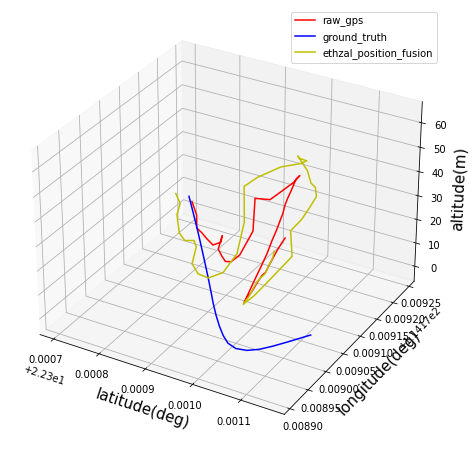

In [31]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used xsensmti and position_noise = 0.01
df_3 = pd.read_csv("2021-07-26-22-09-42-corrected_pose.csv")# taking state_out
trajectory_plot_2(df_1,df_2,df_3)

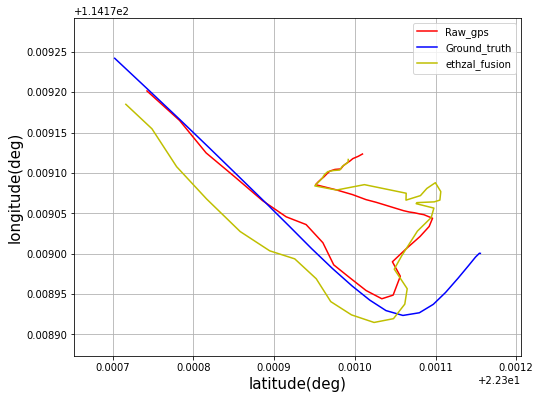

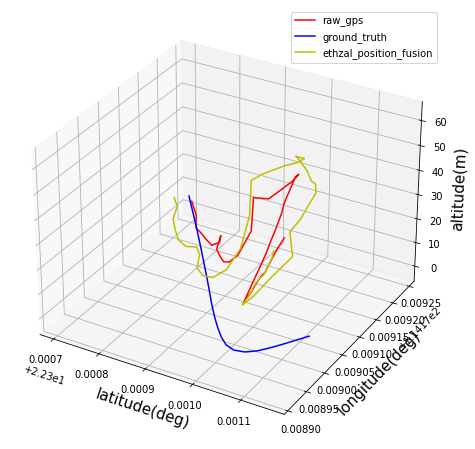

In [32]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")    # used xsensmti and position_noise = 0.01
df_3 = pd.read_csv("2021-07-26-22-43-02-corrected_pose.csv")# taking state_out # imu freq = 20 instead of 100
trajectory_plot_2(df_1,df_2,df_3)

# Frequency change in IMU

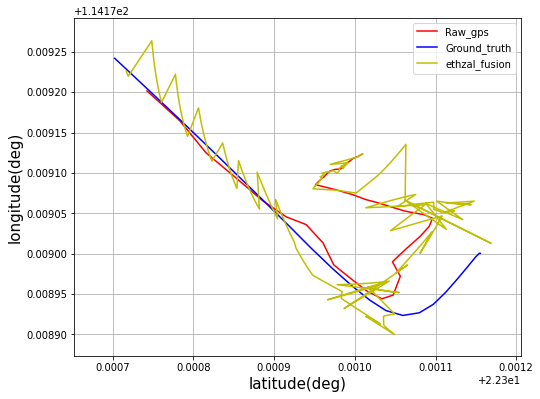

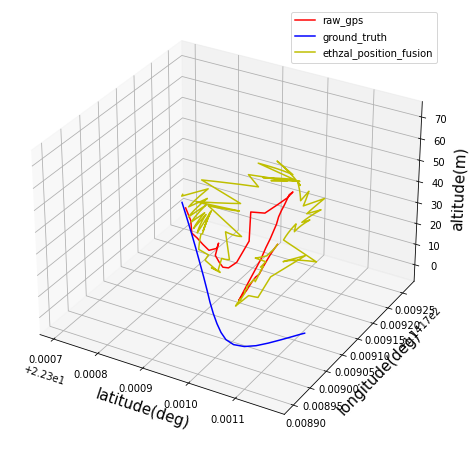

In [18]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")     # used xsensmti and position_noise = 0.01
df_3 = pd.read_csv("2021-07-27-00-19-39-corrected_pose.csv")# taking msf_pose # imu freq = 20 instead of 100
trajectory_plot_2(df_1,df_2,df_3)

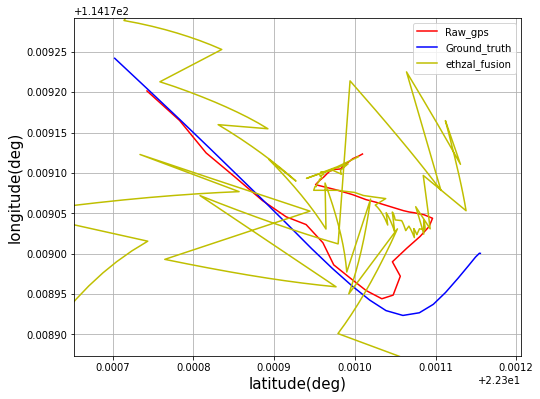

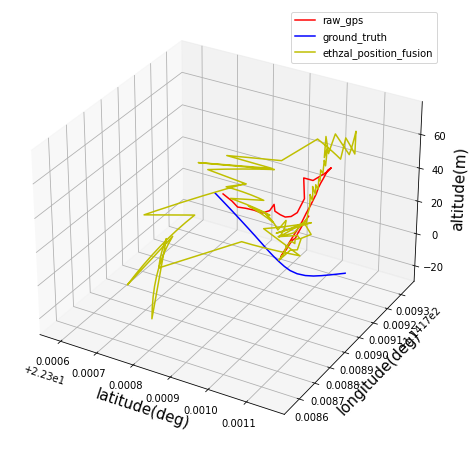

In [19]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")   # used xsensmti and position_noise = 0.01
df_3 = pd.read_csv("2021-07-27-00-34-10-corrected_pose.csv")# taking msf_pose # imu freq = 10 instead of 100
trajectory_plot_2(df_1,df_2,df_3)

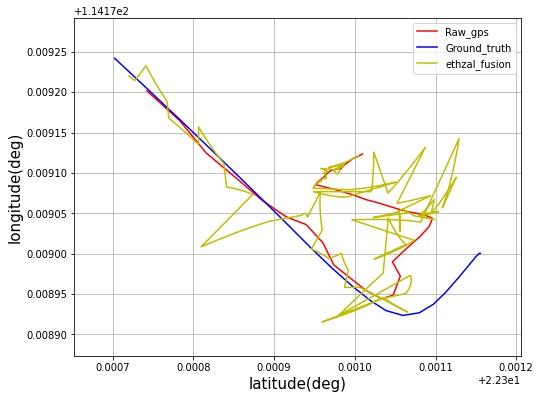

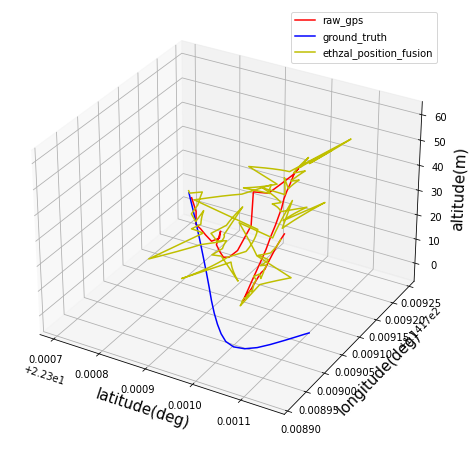

In [20]:
df_1 = pd.read_csv("2021-07-13-13-46-45-ublox_node-fix.csv") ## hongkong dataset with init yaw -141.76
df_2 = pd.read_csv("2021-07-27-14-30-33-novatel_data-inspvax.csv")   # used xsensmti and position_noise = 0.01
df_3 = pd.read_csv("2021-08-17-16-20-10-corrected_pose.csv")# taking msf_pose # 
trajectory_plot_2(df_1,df_2,df_3)

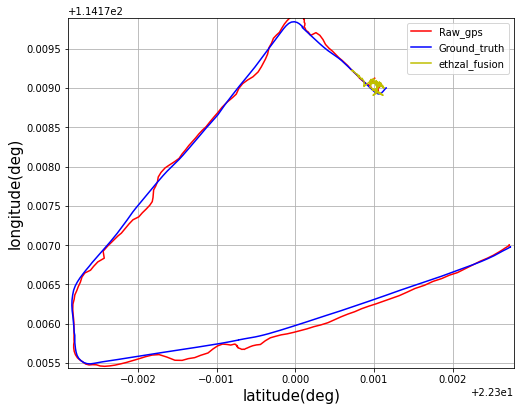

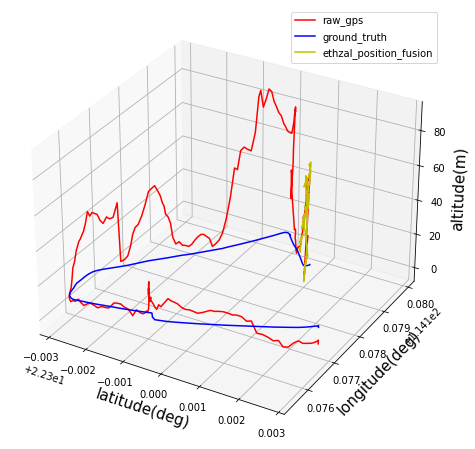

In [21]:
df_1 = pd.read_csv("2019-04-28-20-58-02-ublox_node-fix.csv")  #raw_gps vs groundtruth
df_1 = df_1[:300]## tokyo dataset with init yaw 141.76
df_2 = pd.read_csv("2019-04-28-20-58-02-novatel_data-inspvax.csv")
df_2 = df_2[:300]# used blubird and position_noise = 0.01
df_3 = pd.read_csv("2021-08-24-07-36-48-corrected_pose.csv")
trajectory_plot_2(df_1,df_2,df_3)

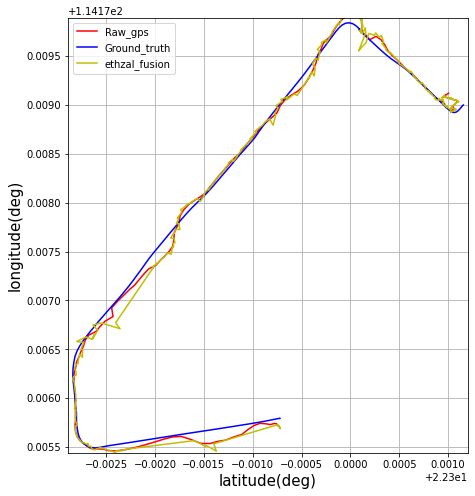

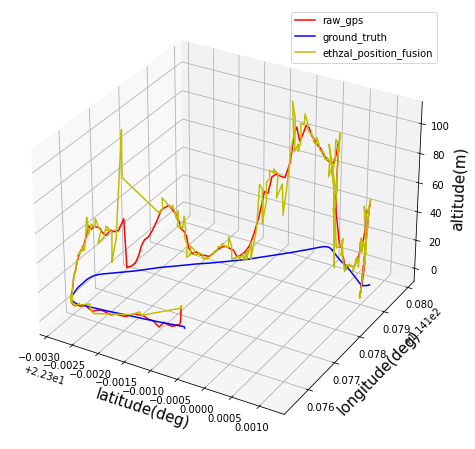

In [22]:
df_1 = pd.read_csv("2021-09-06-13-35-21-ublox_node-fix.csv")  #yaw -141.76
df_2 = pd.read_csv("2021-09-06-13-35-21-novatel_data-inspvax.csv")# used bluebird imu noise parameters and position_noise = 0.01
df_3 = pd.read_csv("2021-09-06-13-35-21-corrected_pose.csv")# taking msf_pose # almost full dataset
trajectory_plot_2(df_1,df_2,df_3)

# acceleration and gyroscope plots

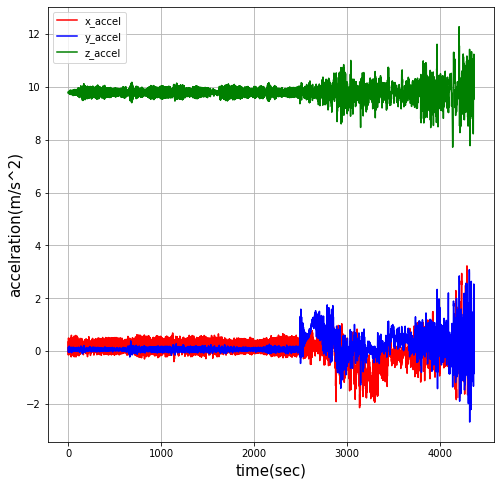

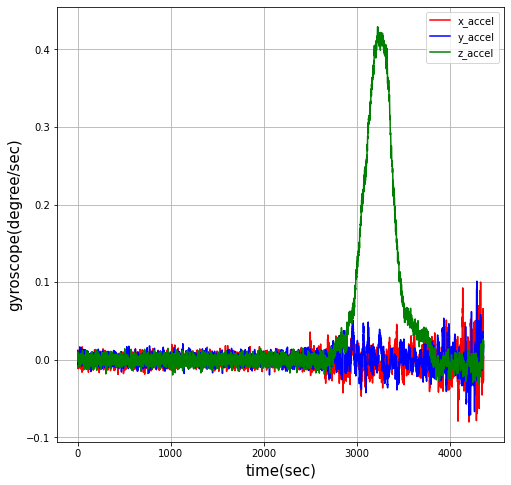

In [24]:
from scipy.interpolate import make_interp_spline

def accel_gyro_plots(df_1):
    accel_x = df_1[".linear_acceleration.x"]
    accel_y = df_1[".linear_acceleration.y"]
    accel_z = df_1[".linear_acceleration.z"]
    gyro_x = df_1[".angular_velocity.x"]
    gyro_y = df_1[".angular_velocity.y"]
    gyro_z = df_1[".angular_velocity.z"]
    
    time = np.arange(len(accel_x))

    fig,ax = plt.subplots(figsize = (8,8))
    ax.set_xlabel("time(sec)",fontsize=15)
    ax.set_ylabel("accelration(m/s^2)",fontsize=15)
    ax.grid()
    ax.plot(time,accel_x,c= "r",label="x_accel")
    ax.plot(time,accel_y,c= "b",label="y_accel")
    ax.plot(time,accel_z,c= "g",label="z_accel")
    plt.legend()
    fig,ax_2 = plt.subplots(figsize = (8,8))
    ax_2.set_xlabel("time(sec)",fontsize=15)
    ax_2.set_ylabel("gyroscope(degree/sec)",fontsize=15)
    ax_2.grid()
    ax_2.plot(time,gyro_x,c= "r",label="x_accel")
    ax_2.plot(time,gyro_y,c= "b",label="y_accel")
    ax_2.plot(time,gyro_z,c= "g",label="z_accel")
    plt.legend()
    
    plt.show()
    
    
accel_gyro= pd.read_csv("2021-09-05-22-55-11-imu-data-sync.csv")
accel_gyro_plots(accel_gyro)

# Kalman_gain

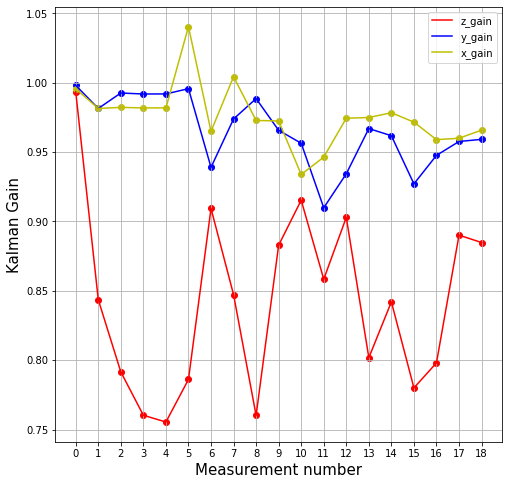

In [25]:
gain_x = [0.995651,0.981436,0.982217,0.981824,0.981874,1.04038,0.964944,1.00431,0.972797,0.972424,0.933864,.946352,0.974401,0.97491,0.97836,0.971584,0.958958,0.959976,0.965805]
gain_y = [0.998066,0.981436,0.992586,0.991847,0.991927,0.99569,0.93899,0.973856,0.98855,0.965687,0.956378,0.909848,0.93436,0.966958,0.961779,0.927088,0.947616,0.957633,0.959167]
gain_z = [0.993412,0.843543,0.791513,0.760292,0.755414,0.786134,0.909354,0.847221,0.76015,0.882864,0.91529,0.858367,0.902922,0.801783,0.841997,0.78002,0.798052,0.890107,0.884817]

# gain_x = [0.9954,0.989,0.9846,0.9841,0.98421,0.9847,0.984668,0.98471,0.98474,0.984805,0.984853,0.984866,0.984913,0.984958,0.985213,0.985493,0.985102,0.985102,0.984948,0.989516,0.985323,0.984854,0.984858 ,0.985261]
# gain_y = [0.997,0.990,0.9847,0.984161,0.984215,0.98468,0.98464,0.98471,0.98469,0.984749,0.984797,0.984814,0.984855,0.984879,0.984931,0.98488,0.984742,0.985368,0.989031,0.99078 ,0.984878,0.984073,0.983362,0.983865]
# gain_z = [0.991,0.980,0.9813,0.98419,0.981824,0.981892,0.98464,0.982083,0.982102,0.982115,0.982126,0.982137,0.982144,0.982154,0.9822,0.982253, 0.982285,0.982145,0.982492,0.982391,0.9822,0.982179,0.982194,0.982184]

time = np.arange(0,19)
# time = np.arange(1,25)
values = range(len(time))
fig,ax = plt.subplots(figsize = (8,8))
ax.set_xlabel("Measurement number",fontsize=15)
ax.set_ylabel("Kalman Gain",fontsize=15)
ax.plot(time,gain_z,c= "r",label="z_gain")
ax.scatter(time,gain_z,c= "r")
plt.xticks(values,time)
ax.plot(time,gain_y,c= "b",label="y_gain")
ax.scatter(time,gain_y,c= "b")
ax.plot(time,gain_x,c= "y",label="x_gain")
ax.scatter(time,gain_x,c= "y")
ax.legend()
ax.grid()
plt.show()

# orientation plots

In [26]:
 def euler_to_quaternion(roll, pitch, yaw):
    
        qx = np.sin(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) - np.cos(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
        qy = np.cos(roll/2) * np.sin(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.cos(pitch/2) * np.sin(yaw/2)
        qz = np.cos(roll/2) * np.cos(pitch/2) * np.sin(yaw/2) - np.sin(roll/2) * np.sin(pitch/2) * np.cos(yaw/2)
        qw = np.cos(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)

        return [qx, qy, qz, qw]


In [27]:
def quaternion_to_euler(q_1,q_2,q_3,q_4):
    (x, y, z, w) = (q_1, q_2, q_3, q_4)
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll = math.atan2(t0, t1)
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = math.asin(t2)
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw = math.atan2(t3, t4)
    out = [roll,pitch,yaw]
    return out

In [28]:
def epoch_timestamp(gps_time):
    ts,ms = gps_time.split(".")
    timestamp = time.mktime(datetime.datetime.strptime(ts, "%Y/%m/%d/%H:%M:%S").timetuple())
    return timestamp

In [29]:
def orientation_plots(df_5,df_6):
    quat_x_ethzasl = df_5[".pose.pose.orientation.x"]
    quat_y_ethzasl = df_5[".pose.pose.orientation.y"]
    quat_z_ethzasl = df_5[".pose.pose.orientation.z"]
    quat_w_ethzasl = df_5[".pose.pose.orientation.w"]
    time_sec_ethzal = df_5[".header.stamp.secs"]

    quat_x_imu = df_6[".orientation.x"]
    quat_y_imu = df_6[".orientation.y"]
    quat_z_imu = df_6[".orientation.z"]
    quat_w_imu = df_6[".orientation.w"]
    time_sec_imu = df_6[".header.stamp.secs"]


    leng_ethzasl = len(quat_x_ethzasl)
    roll_ethzasl = []
    pitch_ethzasl = []
    yaw_ethzasl = []

    for i in range(leng_ethzasl):
        q = quaternion_to_euler(quat_x_ethzasl[i],quat_y_ethzasl[i],quat_z_ethzasl[i],quat_w_ethzasl[i])
        roll_ethzasl.append(q[0])
        pitch_ethzasl.append(q[1])
        yaw_ethzasl.append(q[2])

    leng_imu = len(quat_x_imu)
    roll_imu = []
    pitch_imu = []
    yaw_imu = []

    for i in range(leng_imu):
        q = quaternion_to_euler(quat_x_imu[i],quat_y_imu[i],quat_z_imu[i],quat_w_imu[i])
        roll_imu.append(q[0])
        pitch_imu.append(q[1])
        yaw_imu.append(q[2])

    fig_1 = plt.figure(figsize=(15,15))
    ax= fig_1.add_subplot(111)
    ax.plot(time_sec_ethzal,roll_ethzasl,c="b",label="roll_etzasal ")
    ax.plot(time_sec_imu,roll_imu,c="r",label="roll_imu ")
    plt.xlabel("time(sec)")
    plt.ylabel("roll(radians)")
    plt.legend()
    plt.grid()
    plt.show()

    fig_2 = plt.figure(figsize=(15,15))
    ax= fig_2.add_subplot(111)
    ax.plot(time_sec_ethzal,pitch_ethzasl,c="b",label="pitch_etzasal ")
    ax.plot(time_sec_imu,pitch_imu,c ="r",label="pitch_imu")
    plt.xlabel("time(sec)")
    plt.ylabel("pitch(radians)")
    plt.legend()
    plt.grid()
    plt.show()

    fig_3 = plt.figure(figsize=(15,15))
    ax= fig_3.add_subplot(111)
    ax.plot(time_sec_ethzal,yaw_ethzasl,c="b",label="yaw_etzasal ")
    ax.plot(time_sec_imu,yaw_imu,c ="r",label="yaw_imu")
    plt.xlabel("time(sec)")
    plt.ylabel("yaw(radians)")
    plt.legend()
    plt.grid()
    plt.show()

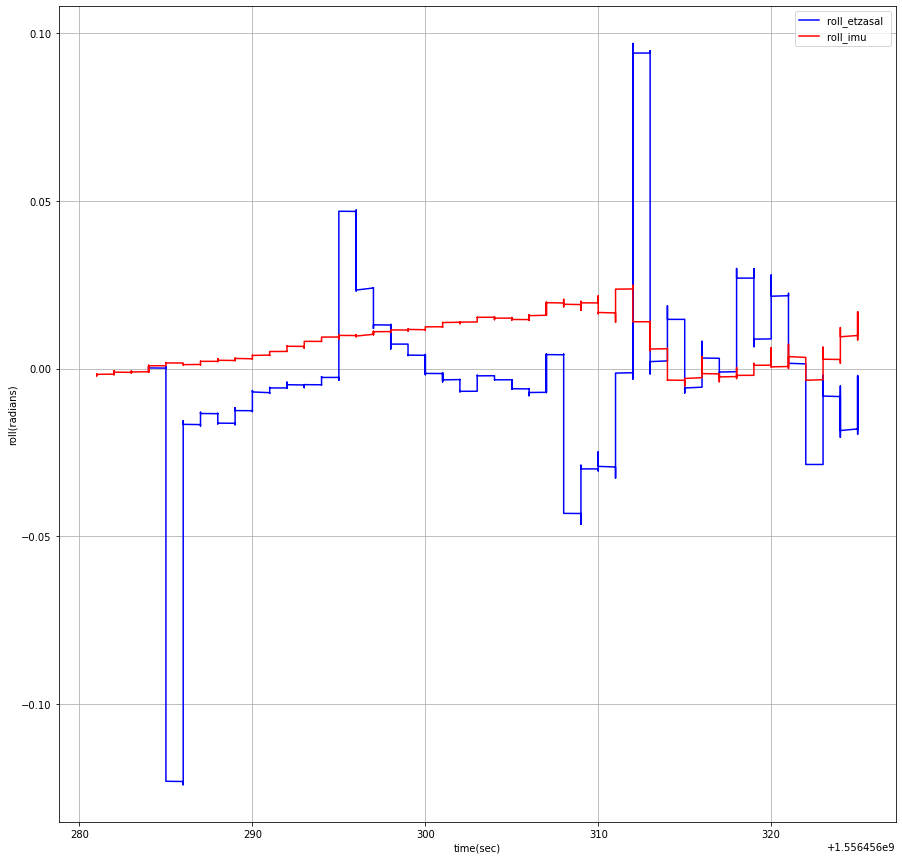

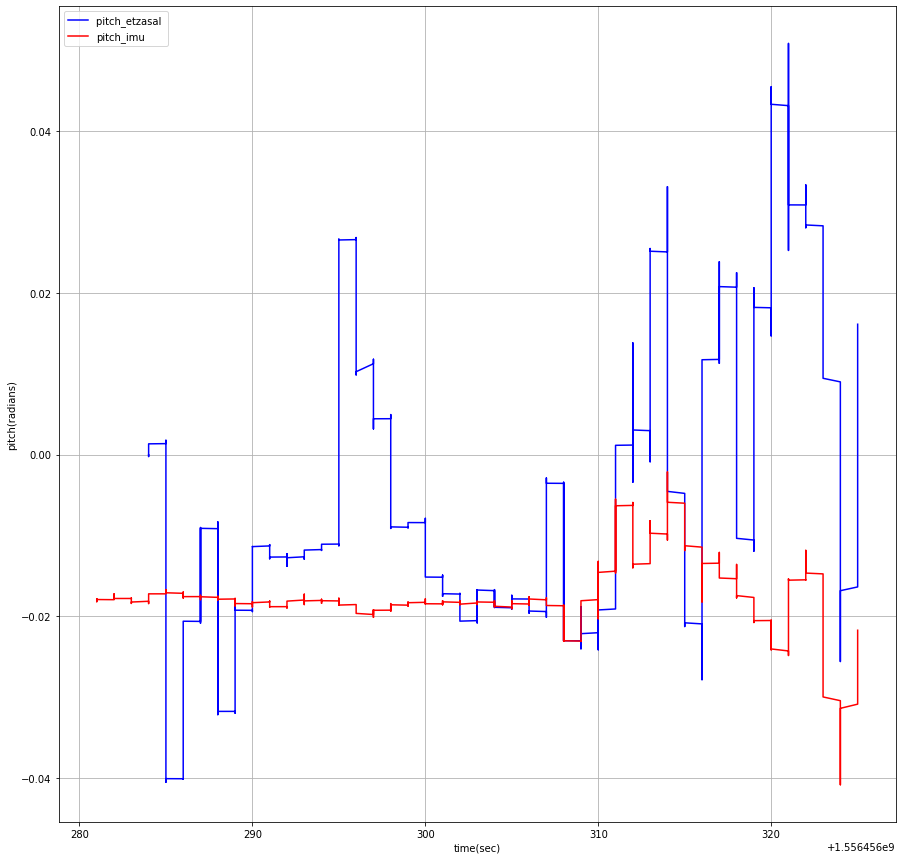

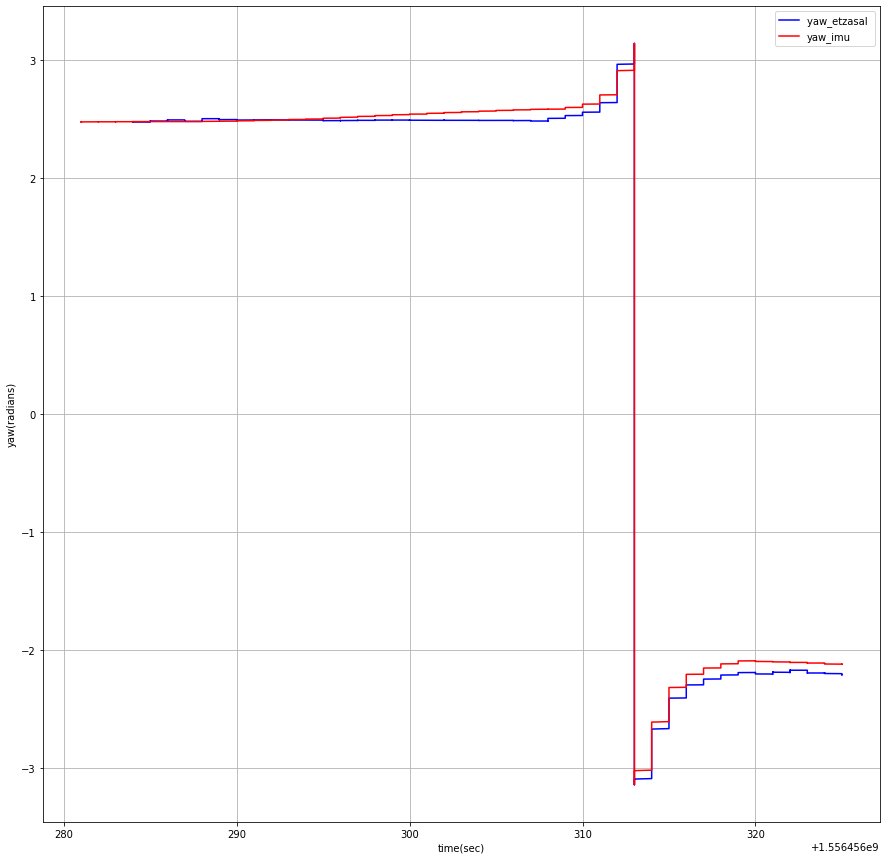

In [30]:
msf_pose_data = pd.read_csv("2021-09-07-01-22-43-msf_core-pose.csv")
imu_data= pd.read_csv("2021-09-07-01-22-43-imu-data-sync.csv")
orientation_plots(msf_pose_data,imu_data)